In [1]:
import numpy as np
from numpy import pi
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
# provider = IBMQ.load_account()

In [2]:
#Define projectors

def p_left(q, phi):
    qc = QuantumCircuit(q)
    
    for q in range(nqubits-1):
        qc.x(q)
    qc.mct(list(range(0,nqubits-1)),nqubits-1)
    for q in range(nqubits-1):
        qc.x(q)
        
    #qc.barrier(0, 1, 2, 3)
    qc.rz(phi, nqubits-1)
    #qc.barrier(0, 1, 2, 3)
    
    for q in range(nqubits-1):
        qc.x(q)
    qc.mct(list(range(0,nqubits-1)),nqubits-1)
    for q in range(nqubits-1):
        qc.x(q)
    
    p_left = qc.to_gate()
    p_left.name = "P$_l$(Φ)"
    return p_left

def p_right(phi):
    qc = QuantumCircuit(2)
    
    qc.cx(0, 1)
    qc.rz(phi, 1)
    qc.cx(0 ,1)
    
    p_right = qc.to_gate()
    p_right.name = "P$_r$(Φ)"
    return p_right

In [3]:
#Define Oracle Unitary and dagger

def U(q):
    qc = QuantumCircuit(q)
    
    for q in range(nqubits-2):
        qc.h(q)
        
    qc.mct(list(range(0,nqubits-2)),nqubits-2)
    
    U = qc.to_gate()
    U.name = "U"
    return U

def U_dag(q):
    qc = QuantumCircuit(q)
    
    qc.mct(list(range(0,nqubits-2)),nqubits-2)
    
    for q in range(nqubits-2):
        qc.h(q)
    
    U_dag = qc.to_gate()
    U_dag.name = "U$_†$"
    return U_dag

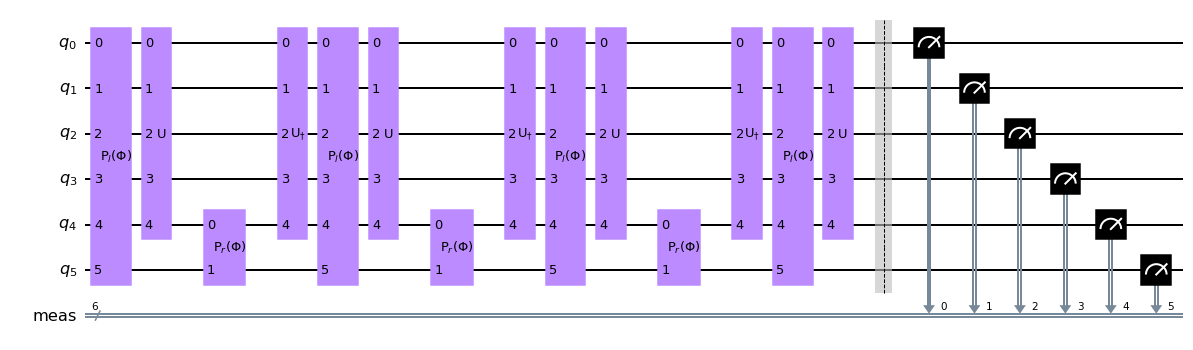

In [4]:
#QSVT with trivial phases for P(x) = T(d,x) where T(d,x) is the dth Chebyshev polynomial
#of the first kind

systemqubits = 4
nqubits = systemqubits + 2
q = QuantumRegister(nqubits, 'q')
circuit = QuantumCircuit(q)  

d = (2*systemqubits) - 1

if systemqubits > 6:
    if systemqubits == 7:
        d = d + 2
    elif systemqubits == 8:
        d = d + 2 + 4
    elif systemqubits == 9:
        d = d + 2 + 4 + 6

circuit.append(p_left(nqubits,(1-d)*pi/2), list(range(0,nqubits)))
circuit.append(U(nqubits-1), list(range(0,nqubits-1)))

for i in range(0, int((d-1)/2)):
    circuit.append(p_right(pi),[nqubits-2, nqubits-1]) #debug this, doesnt work just as a 2 qubit gate
    circuit.append(U_dag(nqubits-1),list(range(0,nqubits-1)))
    circuit.append(p_left(nqubits,pi),list(range(0,nqubits)))
    circuit.append(U(nqubits-1), list(range(0,nqubits-1)))

circuit.measure_all()
circuit.draw()

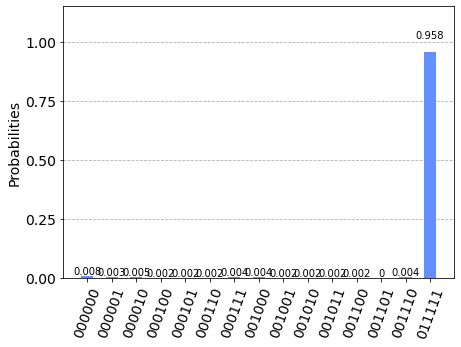

In [5]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, qasm_sim)
qobj = assemble(transpiled_circuit)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

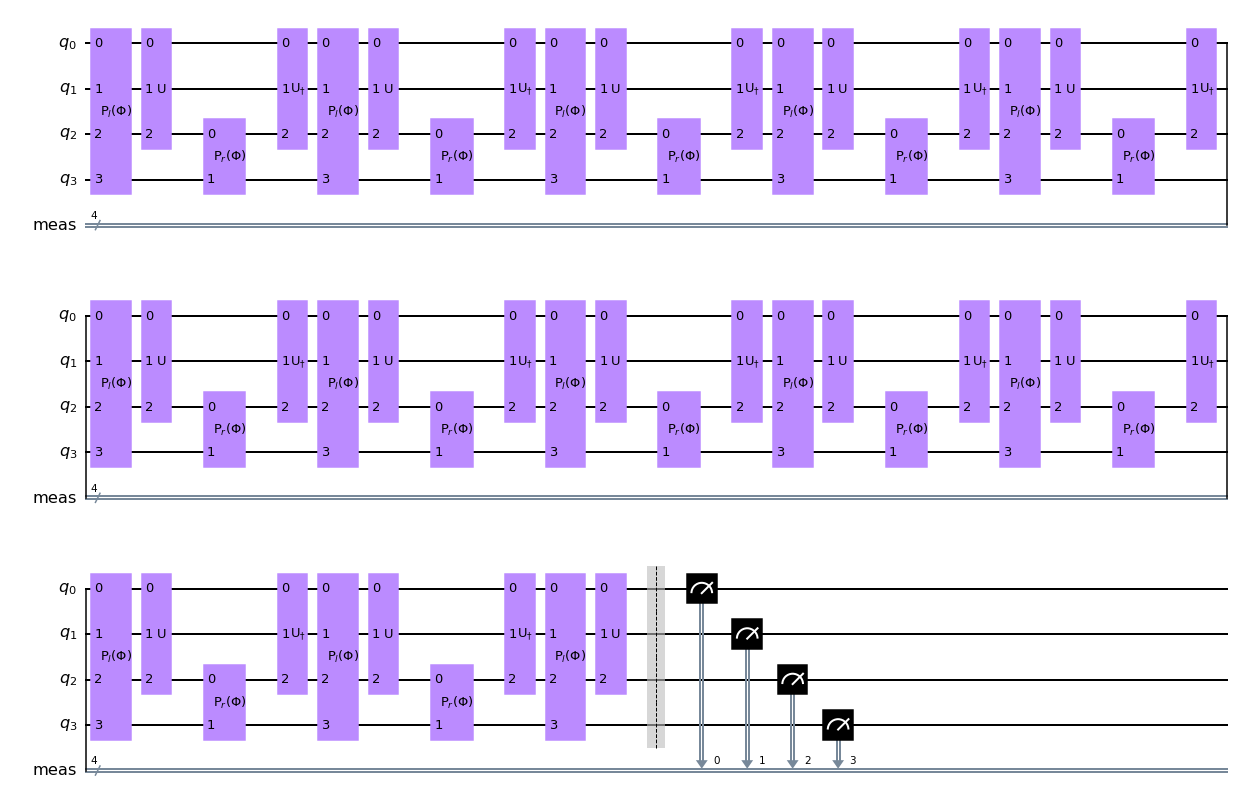

In [90]:
fi = [-0.00228511 ,1.57336133,  1.56788784,  1.57412054,  1.56697361,  1.57521311,
  1.56567456,  1.57675259,  1.5638536,   1.57890486,  1.56130902,  1.5819173,
  1.55773369,  1.58617755,  1.55262773,  1.59234794,  1.54508368,  1.60172344,
  1.53316035,  1.61739434,  1.51155042,  1.64944976,  1.45797163,  1.76193637,
 -0.57815011]

systemqubits = 2
nqubits = systemqubits + 2
q = QuantumRegister(nqubits, 'q')
circuit = QuantumCircuit(q)  

circuit.append(p_left(nqubits, fi[0]), list(range(0,nqubits)))
circuit.append(U(nqubits-1), list(range(0,nqubits-1)))

circuit.append(p_right(fi[1]),[nqubits-2, nqubits-1])
circuit.append(U_dag(nqubits-1),list(range(0,nqubits-1)))
circuit.append(p_left(nqubits, fi[2]),list(range(0,nqubits)))
circuit.append(U(nqubits-1), list(range(0,nqubits-1)))

circuit.append(p_right(fi[3]),[nqubits-2, nqubits-1])
circuit.append(U_dag(nqubits-1),list(range(0,nqubits-1)))
circuit.append(p_left(nqubits, fi[4]),list(range(0,nqubits)))
circuit.append(U(nqubits-1), list(range(0,nqubits-1)))

circuit.append(p_right(fi[5]),[nqubits-2, nqubits-1])
circuit.append(U_dag(nqubits-1),list(range(0,nqubits-1)))
circuit.append(p_left(nqubits, fi[6]),list(range(0,nqubits)))
circuit.append(U(nqubits-1), list(range(0,nqubits-1)))

circuit.append(p_right(fi[7]),[nqubits-2, nqubits-1])
circuit.append(U_dag(nqubits-1),list(range(0,nqubits-1)))
circuit.append(p_left(nqubits, fi[8]),list(range(0,nqubits)))
circuit.append(U(nqubits-1), list(range(0,nqubits-1)))

circuit.append(p_right(fi[9]),[nqubits-2, nqubits-1])
circuit.append(U_dag(nqubits-1),list(range(0,nqubits-1)))
circuit.append(p_left(nqubits, fi[10]),list(range(0,nqubits)))
circuit.append(U(nqubits-1), list(range(0,nqubits-1)))

circuit.append(p_right(fi[11]),[nqubits-2, nqubits-1])
circuit.append(U_dag(nqubits-1),list(range(0,nqubits-1)))
circuit.append(p_left(nqubits, fi[12]),list(range(0,nqubits)))
circuit.append(U(nqubits-1), list(range(0,nqubits-1)))

circuit.append(p_right(fi[13]),[nqubits-2, nqubits-1])
circuit.append(U_dag(nqubits-1),list(range(0,nqubits-1)))
circuit.append(p_left(nqubits, fi[14]),list(range(0,nqubits)))
circuit.append(U(nqubits-1), list(range(0,nqubits-1)))

circuit.append(p_right(fi[15]),[nqubits-2, nqubits-1])
circuit.append(U_dag(nqubits-1),list(range(0,nqubits-1)))
circuit.append(p_left(nqubits, fi[16]),list(range(0,nqubits)))
circuit.append(U(nqubits-1), list(range(0,nqubits-1)))

circuit.append(p_right(fi[17]),[nqubits-2, nqubits-1])
circuit.append(U_dag(nqubits-1),list(range(0,nqubits-1)))
circuit.append(p_left(nqubits, fi[18]),list(range(0,nqubits)))
circuit.append(U(nqubits-1), list(range(0,nqubits-1)))

circuit.append(p_right(fi[19]),[nqubits-2, nqubits-1])
circuit.append(U_dag(nqubits-1),list(range(0,nqubits-1)))
circuit.append(p_left(nqubits, fi[20]),list(range(0,nqubits)))
circuit.append(U(nqubits-1), list(range(0,nqubits-1)))

circuit.append(p_right(fi[21]),[nqubits-2, nqubits-1])
circuit.append(U_dag(nqubits-1),list(range(0,nqubits-1)))
circuit.append(p_left(nqubits, fi[22]),list(range(0,nqubits)))
circuit.append(U(nqubits-1), list(range(0,nqubits-1)))

circuit.append(p_right(fi[23]),[nqubits-2, nqubits-1])
circuit.append(U_dag(nqubits-1),list(range(0,nqubits-1)))
circuit.append(p_left(nqubits, fi[24]),list(range(0,nqubits)))
circuit.append(U(nqubits-1), list(range(0,nqubits-1)))

#for i in fi:
    #circuit.append(p_right(fi[i + 1]),[nqubits-2, nqubits-1]) 
    #circuit.append(U_dag(nqubits-1),list(range(0,nqubits-1)))
    #circuit.append(p_left(nqubits, fi[i + 2]), list(range(0,nqubits)))
    #circuit.append(U(nqubits-1), list(range(0,nqubits-1)))
    

circuit.measure_all()
circuit.draw()

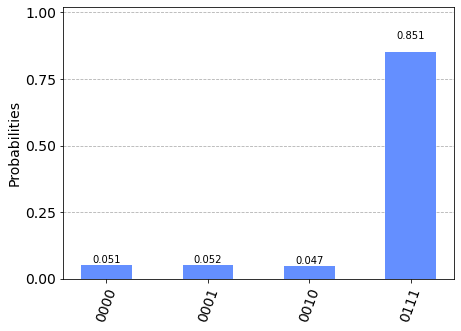

In [91]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, qasm_sim)
qobj = assemble(transpiled_circuit)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [15]:
fi.reverse()
print(fi)

[-0.57815011, 1.76193637, 1.45797163, 1.64944976, 1.51155042, 1.61739434, 1.53316035, 1.60172344, 1.54508368, 1.59234794, 1.55262773, 1.58617755, 1.55773369, 1.5819173, 1.56130902, 1.57890486, 1.5638536, 1.57675259, 1.56567456, 1.57521311, 1.56697361, 1.57412054, 1.56788784, 1.57336133, -0.00228511]


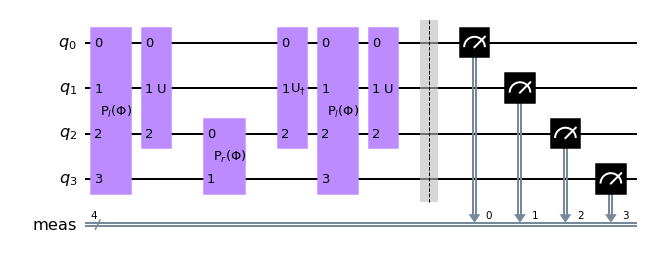

In [6]:
#tot = [2*1.57079799, 2*1.57052022, 2*1.59242051, 2*1.5638175 ]
tot = [2*1.57079648, 2*1.57077135, 2*1.57275266, 2*1.5638175 ]



systemqubits = 2
nqubits = systemqubits + 2
q = QuantumRegister(nqubits, 'q')
circuit = QuantumCircuit(q)  

circuit.append(p_left(nqubits, tot[0]), list(range(0,nqubits)))
circuit.append(U(nqubits-1), list(range(0,nqubits-1)))

for i in range(0,int((len(tot)-1)/2)):
    circuit.append(p_right(tot[2*i + 1]),[nqubits-2, nqubits-1]) 
    circuit.append(U_dag(nqubits-1),list(range(0,nqubits-1)))
    circuit.append(p_left(nqubits, tot[2*i+2]), list(range(0,nqubits)))
    circuit.append(U(nqubits-1), list(range(0,nqubits-1)))
    i = i+2
    
#circuit.append(p_right(tot[49]),[nqubits-2, nqubits-1]) 
#circuit.append(U_dag(nqubits-1),list(range(0,nqubits-1)))
    

circuit.measure_all()
circuit.draw()

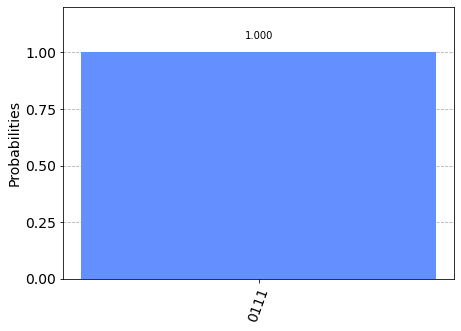

In [7]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, qasm_sim)
qobj = assemble(transpiled_circuit)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

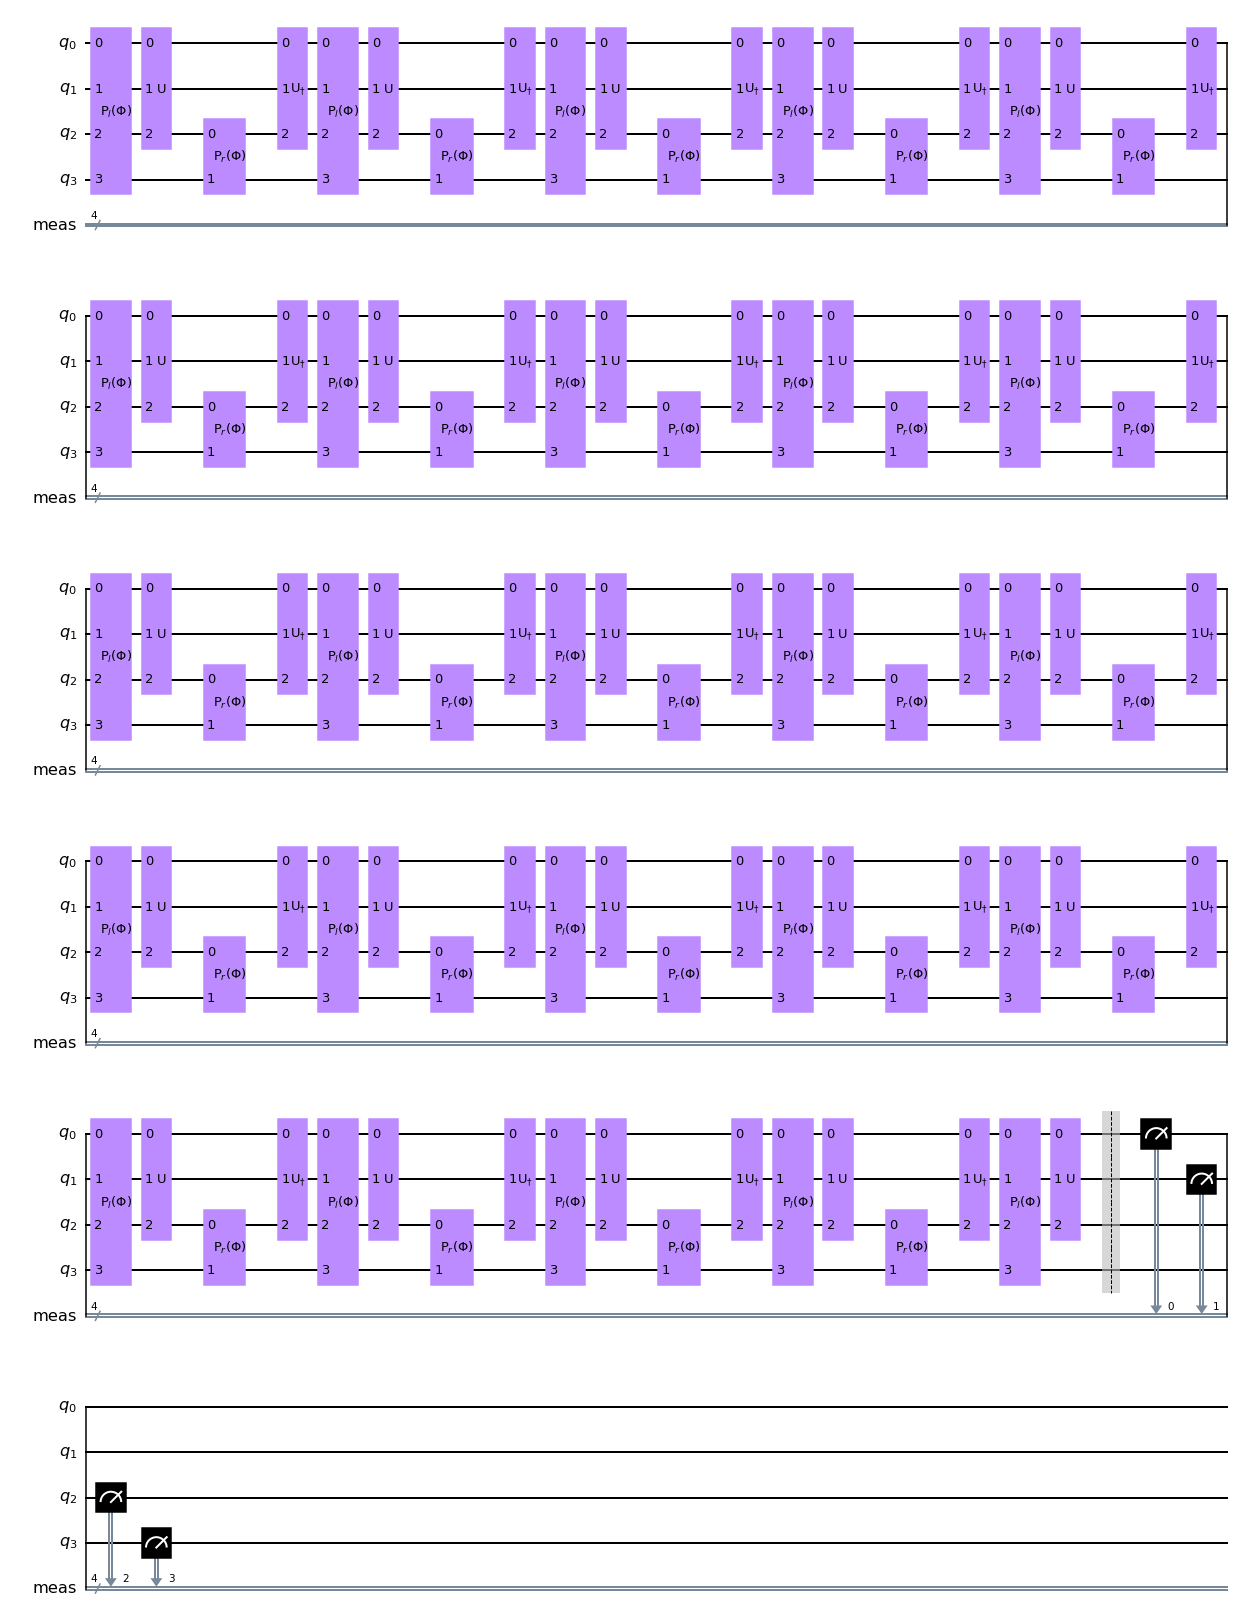

In [12]:
#fi values with d=100 for tanh(20*x) / 1.1
#solved with direct method ~c/2 from the QSP paper

tot = [-0.008477665649999966, 1.5798406127448965, 1.5611335548948966, 1.5811356823448965, 
      1.5597148605448965, 1.5826943673948966, 1.5579963940448966, 1.5845967940448966, 
      1.5558801334948966, 1.5869642588948965, 1.5532140680948965, 1.5899899698448965, 
      1.5497487064448965, 1.5940019420948965, 1.5450438018948967, 1.5996054165948965, 
      1.5382433274448966, 1.6080532066948965, 1.5274349775448965, 1.6224240912948966, 
      1.5073016952948965, 1.6528413257948966, 1.4555007362948966, 1.7634387747948965, -0.5786542749999999,
       -0.5786542749999999, 1.7634387747948965, 1.4555007362948966, 1.6528413257948966, 1.5073016952948965, 
              1.6224240912948966, 1.5274349775448965, 1.6080532066948965, 1.5382433274448966, 1.5996054165948965, 
              1.5450438018948967, 1.5940019420948965, 1.5497487064448965, 1.5899899698448965, 1.5532140680948965, 
              1.5869642588948965, 1.5558801334948966, 1.5845967940448966, 1.5579963940448966, 1.5826943673948966, 
              1.5597148605448965, 1.5811356823448965, 1.5611335548948966, 1.5798406127448965, -0.008477665649999966]


systemqubits = 2
nqubits = systemqubits + 2
q = QuantumRegister(nqubits, 'q')
circuit = QuantumCircuit(q)  

circuit.append(p_left(nqubits, tot[0]), list(range(0,nqubits)))
circuit.append(U(nqubits-1), list(range(0,nqubits-1)))

for i in range(0,int((len(tot)-1)/2)):
    circuit.append(p_right(tot[2*i + 1]),[nqubits-2, nqubits-1]) 
    circuit.append(U_dag(nqubits-1),list(range(0,nqubits-1)))
    circuit.append(p_left(nqubits, tot[2*i+2]), list(range(0,nqubits)))
    circuit.append(U(nqubits-1), list(range(0,nqubits-1)))
    i = i+2
    
#circuit.append(p_right(tot[int(len(tot))-1]),[nqubits-2, nqubits-1]) 
#circuit.append(U_dag(nqubits-1),list(range(0,nqubits-1)))
    

circuit.measure_all()
circuit.draw()

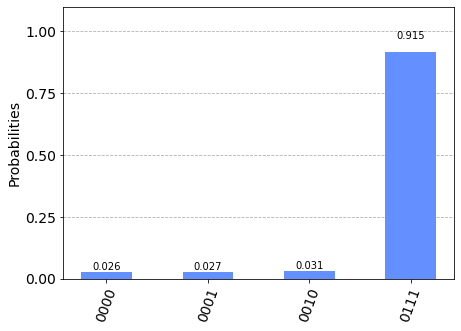

In [13]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, qasm_sim)
qobj = assemble(transpiled_circuit)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

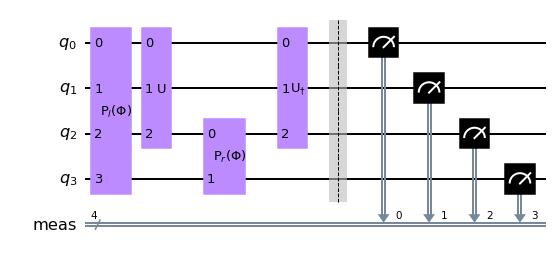

In [82]:
systemqubits = 2
nqubits = systemqubits + 2
q = QuantumRegister(nqubits, 'q')
circuit = QuantumCircuit(q)  

circuit.append(p_left(nqubits, 0.11490348500000003), list(range(0,nqubits)))
circuit.append(U(nqubits-1), list(range(0,nqubits-1)))

circuit.append(p_right(-0.38259884350000006),[nqubits-2, nqubits-1])
circuit.append(U_dag(nqubits-1),list(range(0,nqubits-1)))

circuit.measure_all()
circuit.draw()